<a href="https://www.kaggle.com/code/rajatraj0502/exploring-breast-cancer-patient-survival?scriptVersionId=138362981" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/increasing-breast-cancer-awareness/breast_cancer_survival.csv


In [2]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('/kaggle/input/increasing-breast-cancer-awareness/breast_cancer_survival.csv')

# Display the first few rows of the dataframe
df.head()


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


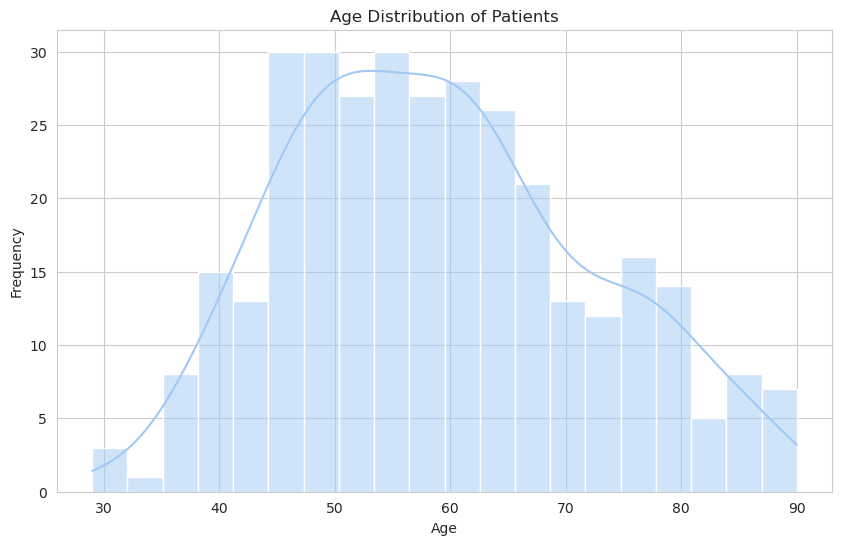

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a histogram for the Age column
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


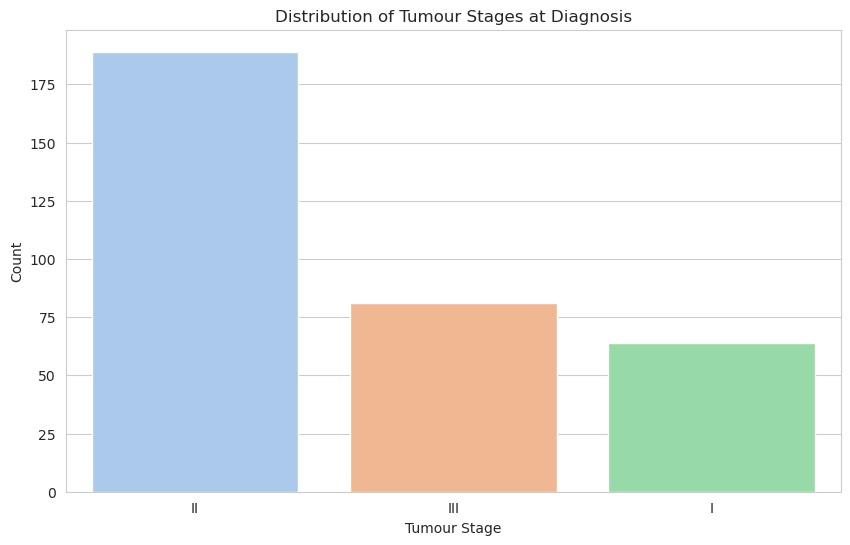

In [4]:
# Create a countplot for the Tumour_Stage column
plt.figure(figsize=(10,6))
sns.countplot(x='Tumour_Stage', data=df, order=df['Tumour_Stage'].value_counts().index)
plt.title('Distribution of Tumour Stages at Diagnosis')
plt.xlabel('Tumour Stage')
plt.ylabel('Count')
plt.show()


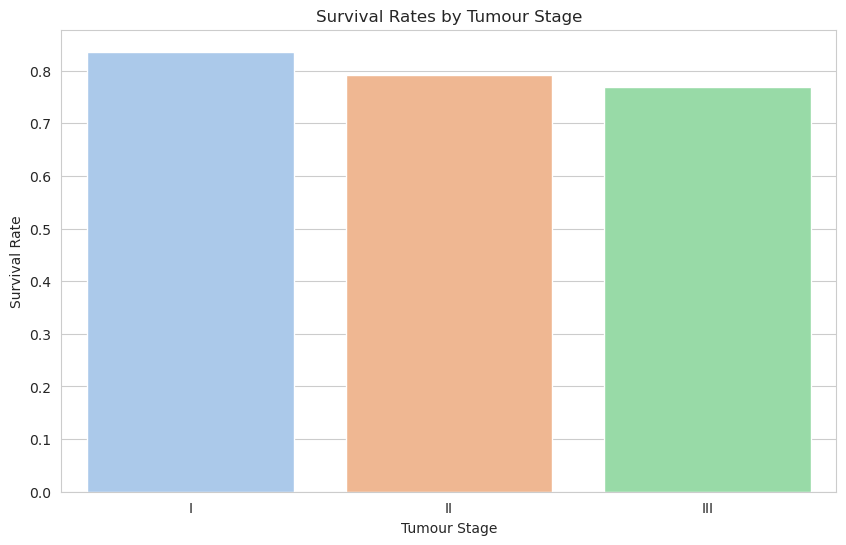

In [5]:
# Create a dataframe with the survival status for each tumour stage
survival_by_stage = df.groupby(['Tumour_Stage', 'Patient_Status']).size().unstack().reset_index()

# Calculate the survival rate for each stage
survival_by_stage['Survival_Rate'] = survival_by_stage['Alive'] / (survival_by_stage['Alive'] + survival_by_stage['Dead'])

# Create a bar plot for the survival rates by stage
plt.figure(figsize=(10,6))
sns.barplot(x='Tumour_Stage', y='Survival_Rate', data=survival_by_stage)
plt.title('Survival Rates by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Survival Rate')
plt.show()


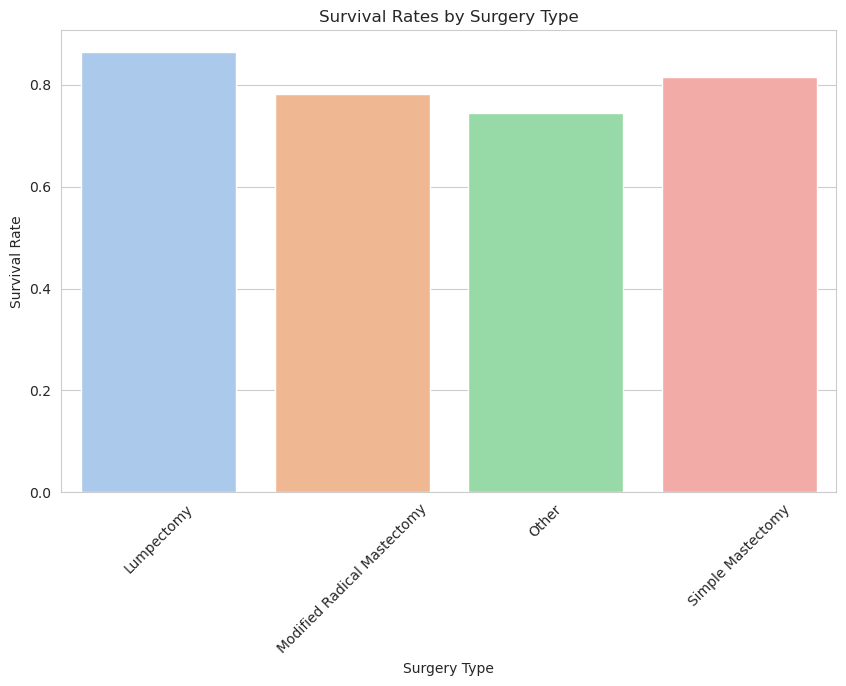

In [6]:
# Create a dataframe with the survival status for each surgery type
survival_by_surgery = df.groupby(['Surgery_type', 'Patient_Status']).size().unstack().reset_index()

# Calculate the survival rate for each surgery type
survival_by_surgery['Survival_Rate'] = survival_by_surgery['Alive'] / (survival_by_surgery['Alive'] + survival_by_surgery['Dead'])

# Create a bar plot for the survival rates by surgery type
plt.figure(figsize=(10,6))
sns.barplot(x='Surgery_type', y='Survival_Rate', data=survival_by_surgery)
plt.title('Survival Rates by Surgery Type')
plt.xlabel('Surgery Type')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()


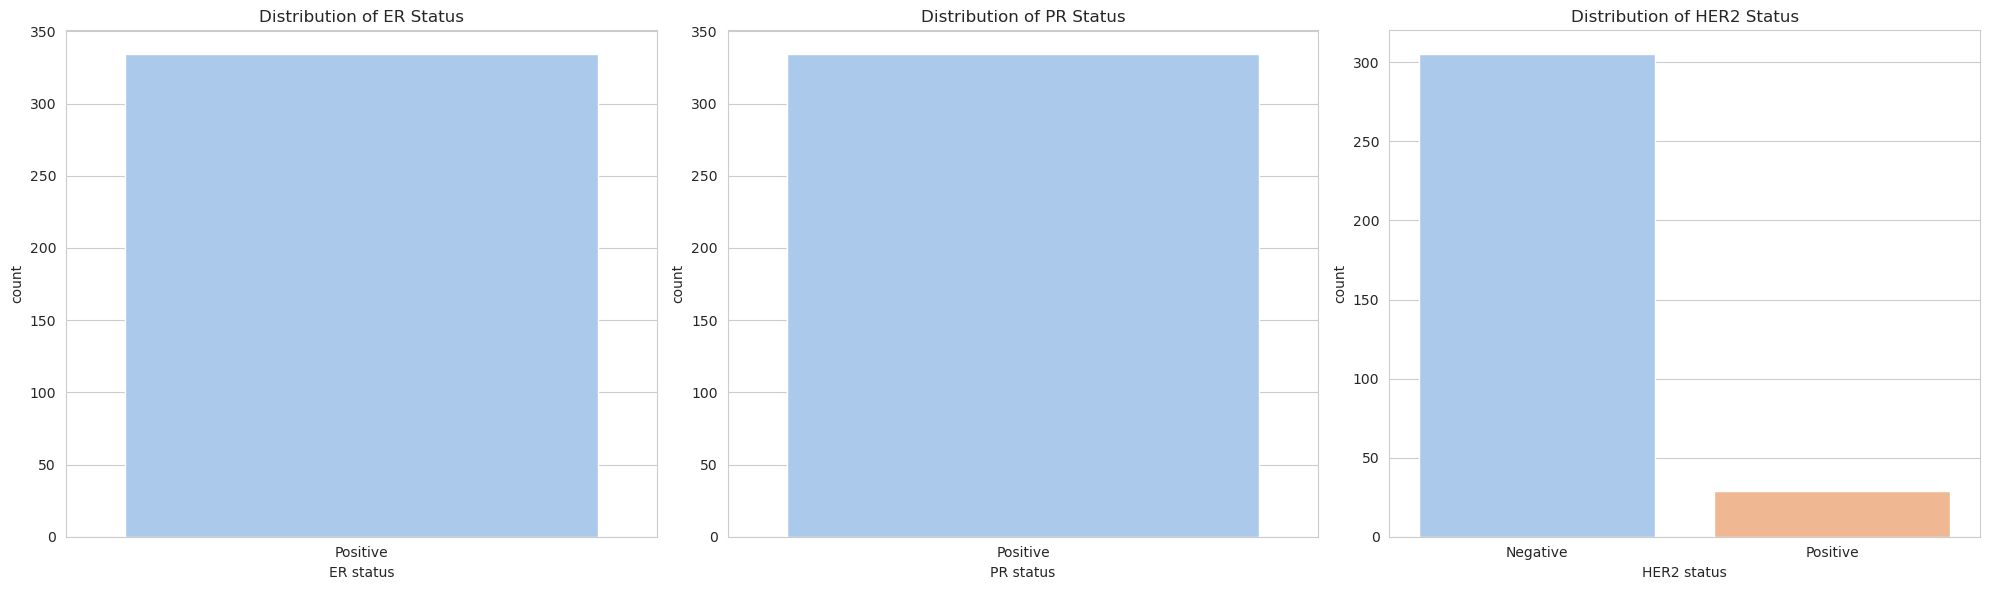

In [7]:
# Create a countplot for the ER status, PR status, and HER2 status columns
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(x='ER status', data=df, ax=ax[0])
ax[0].set_title('Distribution of ER Status')

sns.countplot(x='PR status', data=df, ax=ax[1])
ax[1].set_title('Distribution of PR Status')

sns.countplot(x='HER2 status', data=df, ax=ax[2])
ax[2].set_title('Distribution of HER2 Status')

plt.tight_layout()
plt.show()


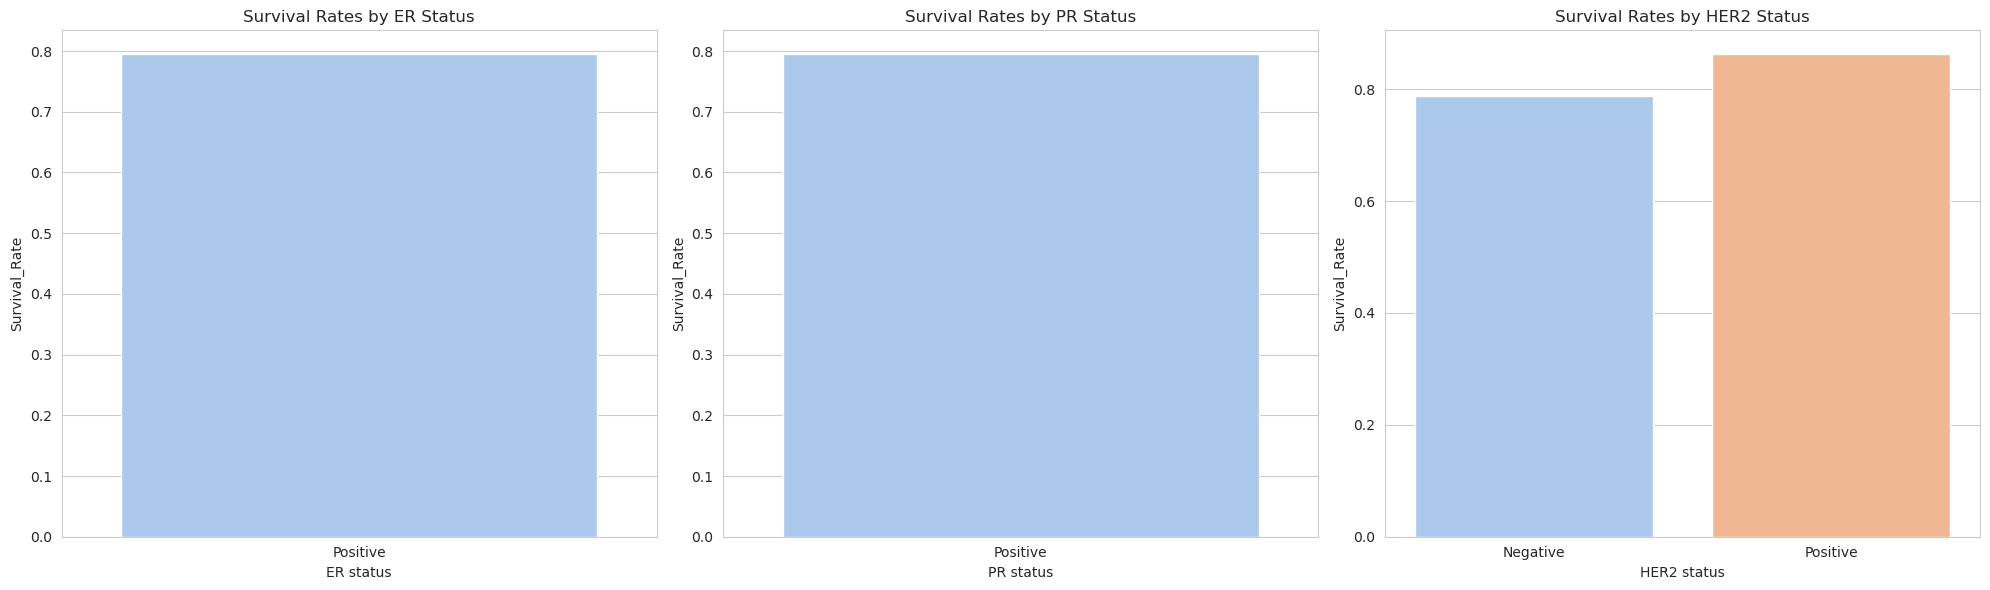

In [8]:
# Create dataframes with the survival status for each hormone receptor status
survival_by_er_status = df.groupby(['ER status', 'Patient_Status']).size().unstack().reset_index()
survival_by_pr_status = df.groupby(['PR status', 'Patient_Status']).size().unstack().reset_index()
survival_by_her2_status = df.groupby(['HER2 status', 'Patient_Status']).size().unstack().reset_index()

# Calculate the survival rate for each hormone receptor status
survival_by_er_status['Survival_Rate'] = survival_by_er_status['Alive'] / (survival_by_er_status['Alive'] + survival_by_er_status['Dead'])
survival_by_pr_status['Survival_Rate'] = survival_by_pr_status['Alive'] / (survival_by_pr_status['Alive'] + survival_by_pr_status['Dead'])
survival_by_her2_status['Survival_Rate'] = survival_by_her2_status['Alive'] / (survival_by_her2_status['Alive'] + survival_by_her2_status['Dead'])

# Create bar plots for the survival rates by hormone receptor status
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(x='ER status', y='Survival_Rate', data=survival_by_er_status, ax=ax[0])
ax[0].set_title('Survival Rates by ER Status')

sns.barplot(x='PR status', y='Survival_Rate', data=survival_by_pr_status, ax=ax[1])
ax[1].set_title('Survival Rates by PR Status')

sns.barplot(x='HER2 status', y='Survival_Rate', data=survival_by_her2_status, ax=ax[2])
ax[2].set_title('Survival Rates by HER2 Status')

plt.tight_layout()
plt.show()


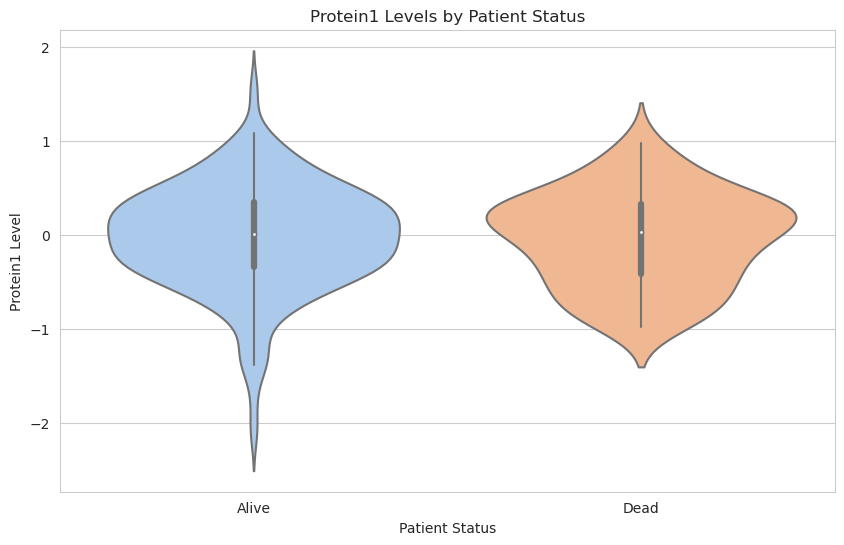

In [9]:
# Create a violin plot for the Protein1 levels by patient status
plt.figure(figsize=(10,6))
sns.violinplot(x='Patient_Status', y='Protein1', data=df)
plt.title('Protein1 Levels by Patient Status')
plt.xlabel('Patient Status')
plt.ylabel('Protein1 Level')
plt.show()


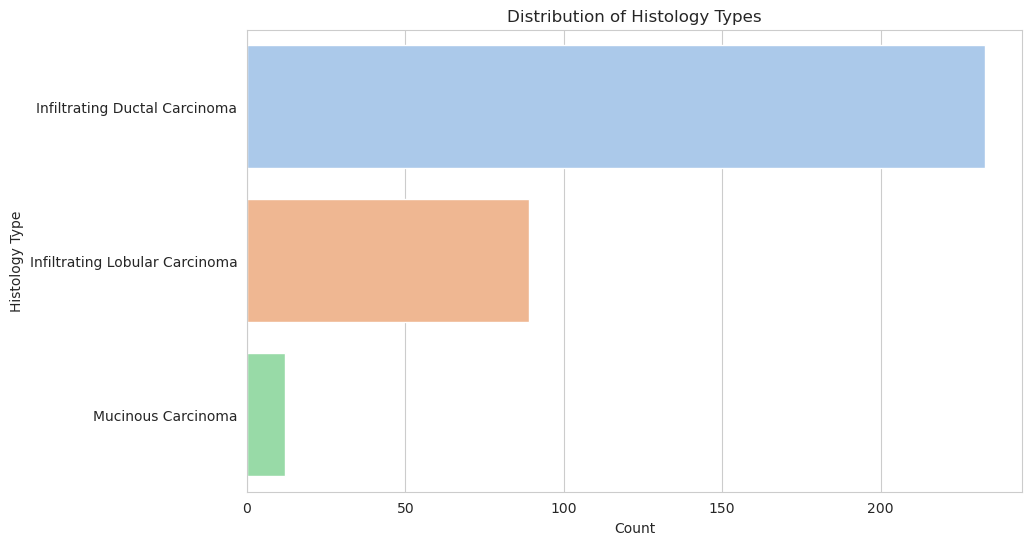

In [10]:
# Create a countplot for the Histology column
plt.figure(figsize=(10,6))
sns.countplot(y='Histology', data=df, order=df['Histology'].value_counts().index)
plt.title('Distribution of Histology Types')
plt.xlabel('Count')
plt.ylabel('Histology Type')
plt.show()


In [11]:
# Convert the date columns to datetime format
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])


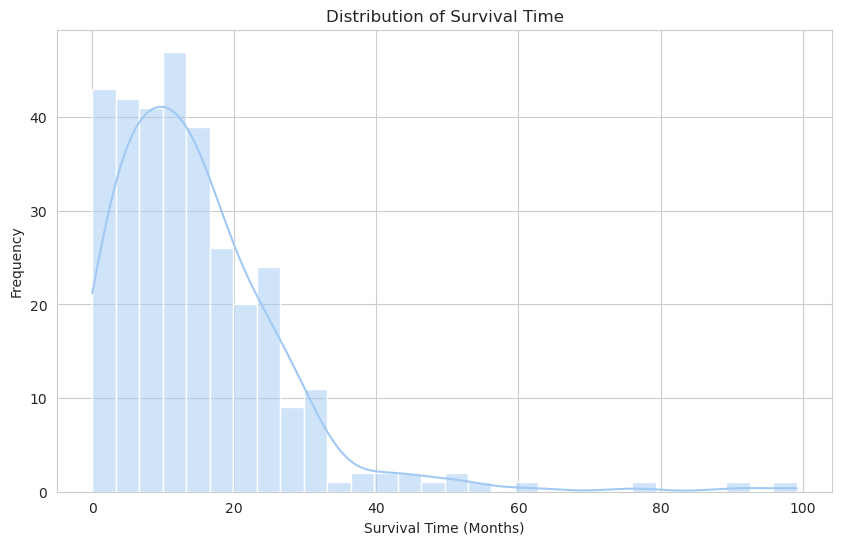

In [12]:
# Calculate the survival time in days
df['Survival_Time_Days'] = (df['Date_of_Last_Visit'] - df['Date_of_Surgery']).dt.days

# Convert the survival time to months
df['Survival_Time_Months'] = df['Survival_Time_Days'] / 30.44

# Create a histogram for the Survival_Time_Months column
plt.figure(figsize=(10,6))
sns.histplot(df['Survival_Time_Months'], bins=30, kde=True)
plt.title('Distribution of Survival Time')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Check for missing or infinite values in the 'Survival_Time_Months' and protein columns
missing_or_infinite_values = df[['Protein1', 'Protein2', 'Protein3', 'Protein4', 'Survival_Time_Months']].isnull().sum()
missing_or_infinite_values


Protein1                 0
Protein2                 0
Protein3                 0
Protein4                 0
Survival_Time_Months    17
dtype: int64

In [14]:
# Remove the rows with missing values in the 'Survival_Time_Months' column
df_clean = df.dropna(subset=['Survival_Time_Months'])

# Check the number of rows in the cleaned dataframe
len(df_clean)


317

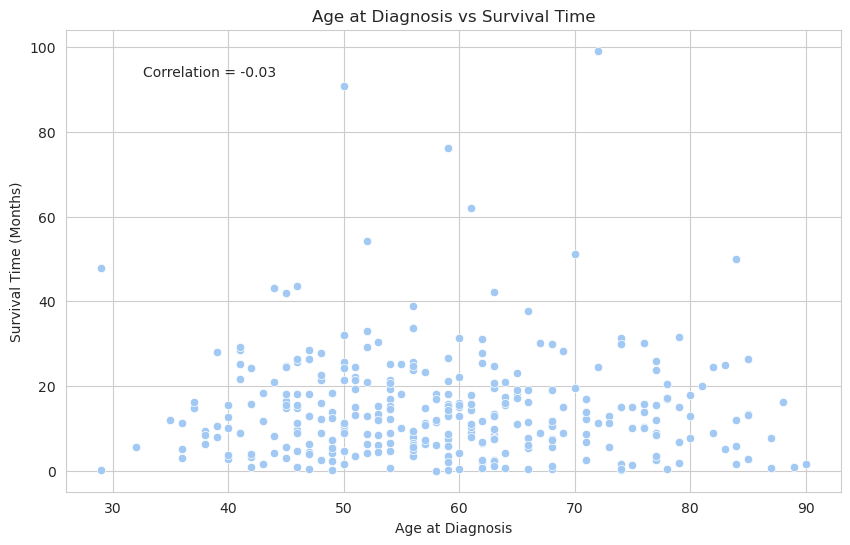

In [15]:
from scipy.stats import pearsonr


# Create a scatter plot for the Age vs Survival Time
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Survival_Time_Months', data=df_clean)
plt.title('Age at Diagnosis vs Survival Time')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Survival Time (Months)')

# Calculate the correlation between Age and Survival Time
corr_age_survival, _ = pearsonr(df_clean['Age'], df_clean['Survival_Time_Months'])
plt.annotate(f'Correlation = {corr_age_survival:.2f}', xy=(0.1, 0.9), xycoords='axes fraction')

plt.show()


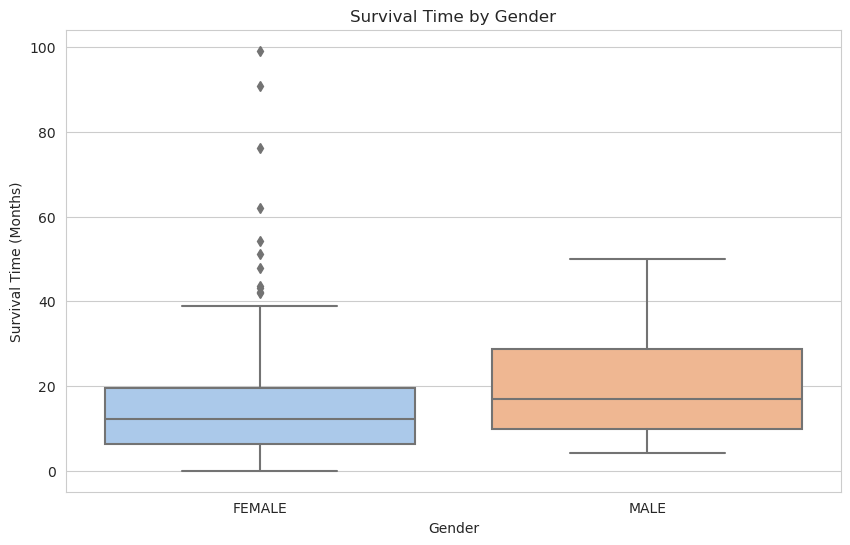

In [16]:
# Create a box plot for the Survival Time by Gender
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Survival_Time_Months', data=df_clean)
plt.title('Survival Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Time (Months)')
plt.show()


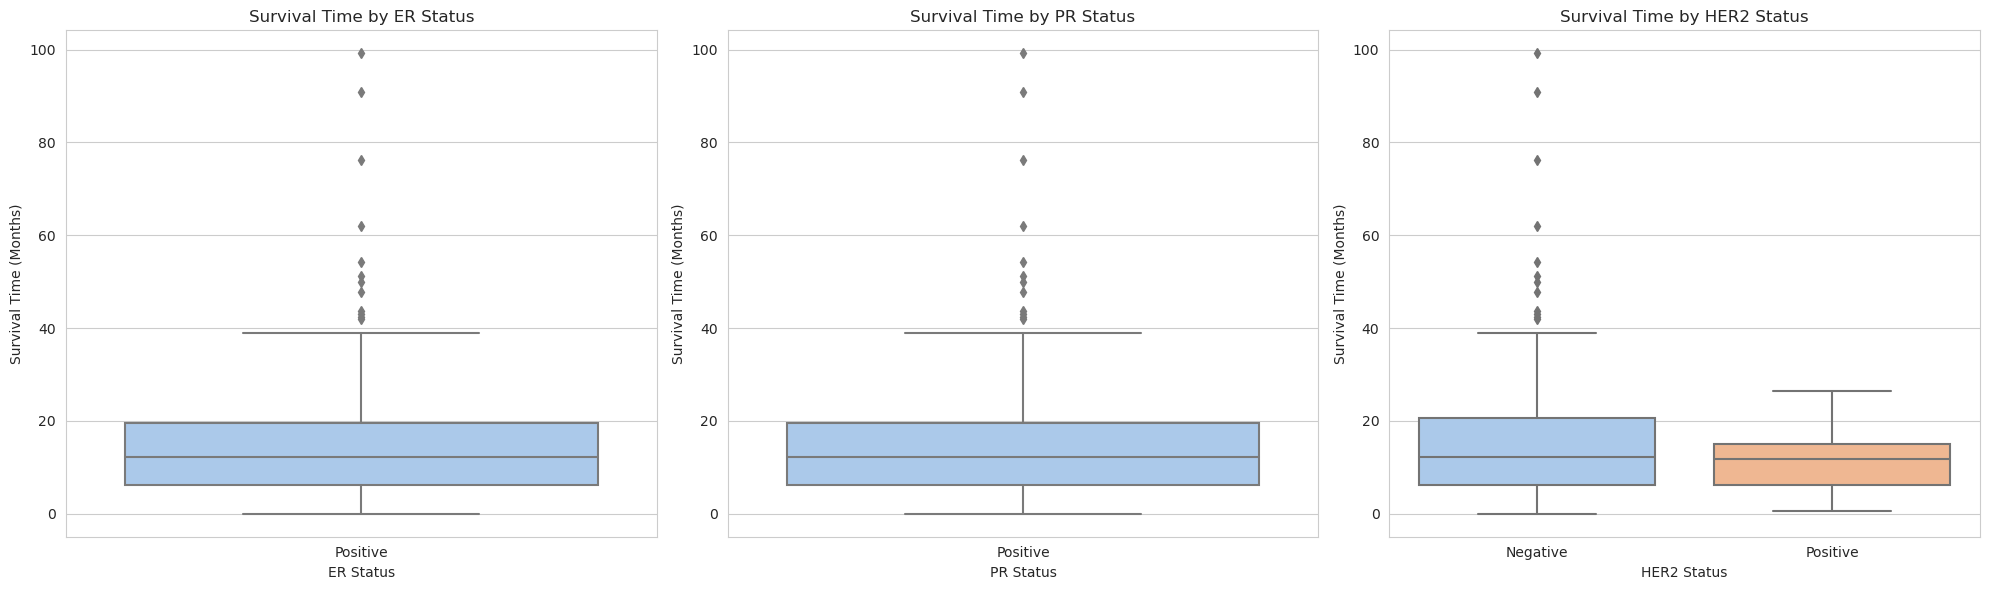

In [17]:
# Create box plots for the Survival Time by hormone receptor status
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='ER status', y='Survival_Time_Months', data=df_clean, ax=ax[0])
ax[0].set_title('Survival Time by ER Status')
ax[0].set_xlabel('ER Status')
ax[0].set_ylabel('Survival Time (Months)')

sns.boxplot(x='PR status', y='Survival_Time_Months', data=df_clean, ax=ax[1])
ax[1].set_title('Survival Time by PR Status')
ax[1].set_xlabel('PR Status')
ax[1].set_ylabel('Survival Time (Months)')

sns.boxplot(x='HER2 status', y='Survival_Time_Months', data=df_clean, ax=ax[2])
ax[2].set_title('Survival Time by HER2 Status')
ax[2].set_xlabel('HER2 Status')
ax[2].set_ylabel('Survival Time (Months)')

plt.tight_layout()
plt.show()


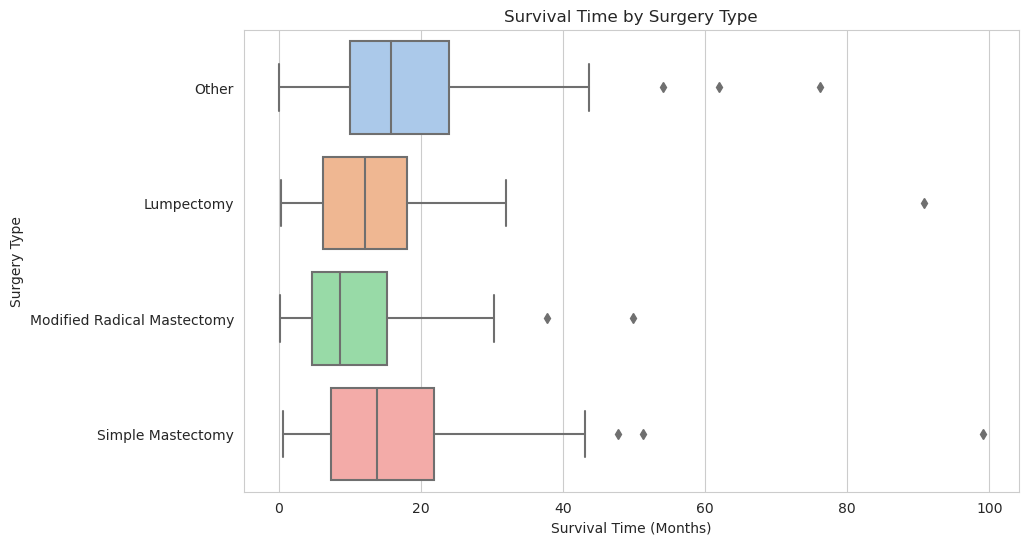

In [18]:
# Create a box plot for the Survival Time by Surgery Type
plt.figure(figsize=(10,6))
sns.boxplot(x='Survival_Time_Months', y='Surgery_type', data=df_clean)
plt.title('Survival Time by Surgery Type')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Surgery Type')
plt.show()


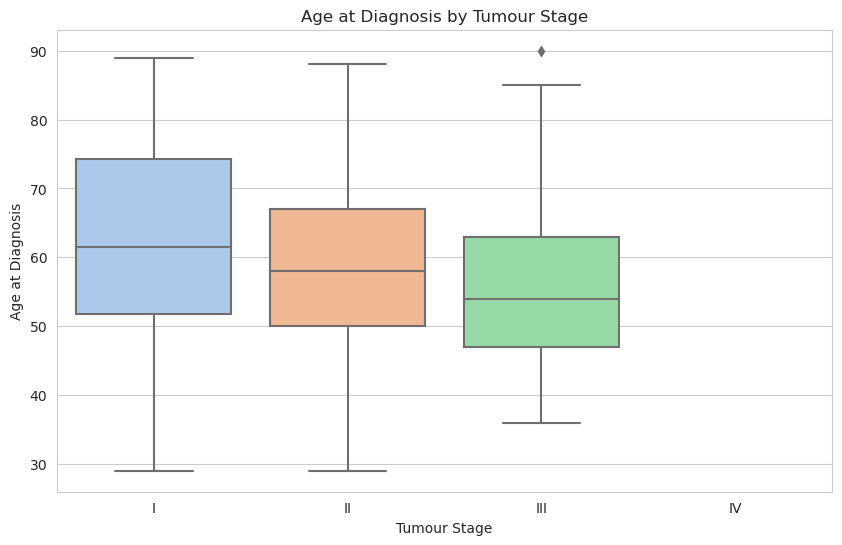

In [19]:
# Create a box plot for the Age by Tumour Stage
plt.figure(figsize=(10,6))
sns.boxplot(x='Tumour_Stage', y='Age', data=df_clean, order=['I', 'II', 'III', 'IV'])
plt.title('Age at Diagnosis by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Age at Diagnosis')
plt.show()


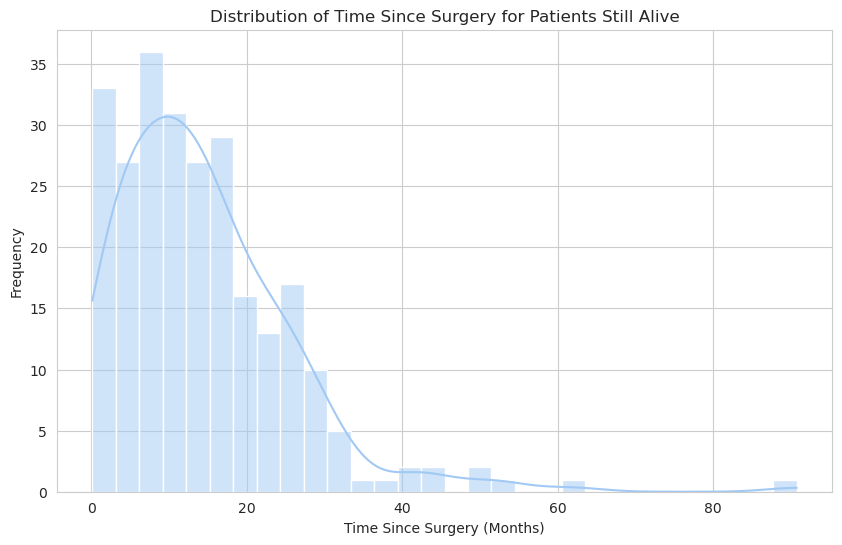

In [20]:
# Filter the dataframe to include only patients who are still alive
df_alive = df_clean[df_clean['Patient_Status'] == 'Alive']

# Create a histogram for the time since surgery
plt.figure(figsize=(10,6))
sns.histplot(df_alive['Survival_Time_Months'], bins=30, kde=True)
plt.title('Distribution of Time Since Surgery for Patients Still Alive')
plt.xlabel('Time Since Surgery (Months)')
plt.ylabel('Frequency')
plt.show()


In [21]:
# Import the necessary libraries
try:
    from lifelines import KaplanMeierFitter
except ImportError:
    KaplanMeierFitter = None

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    # Proceed with the Kaplan-Meier analysis using lifelines
    kmf = KaplanMeierFitter()

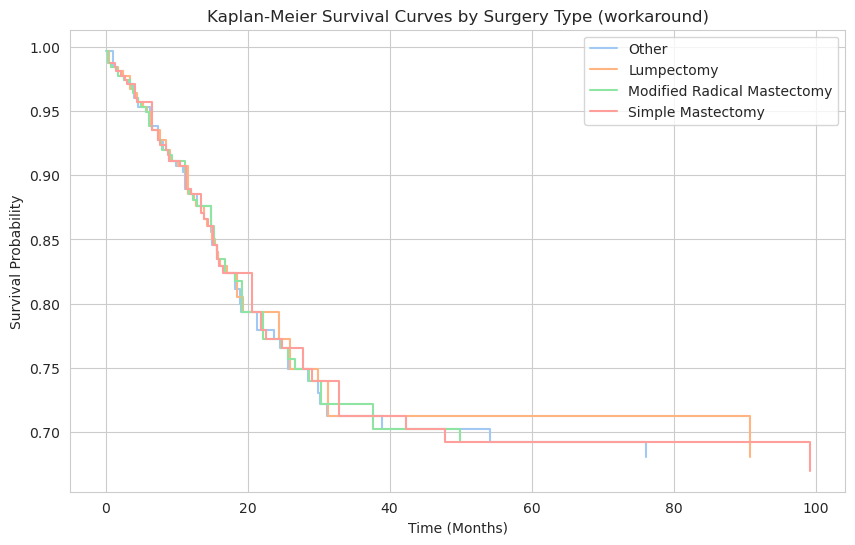

In [22]:
# Identify the unique Surgery types in the dataset
unique_surgery_types = df_clean['Surgery_type'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    plt.figure(figsize=(10,6))

    # Surgery type
    for surgery_type in unique_surgery_types:
        mask = df_clean['Surgery_type'] == surgery_type
        kmf.fit(T[mask], E[mask], label=f'{surgery_type}')
        kmf.plot_survival_function()

    plt.title('Kaplan-Meier Survival Curves by Surgery Type')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')

    plt.show()
else:
    # lifelines is not available, so we'll create a workaround
    survival_data_surgery = df_clean.groupby(['Survival_Time_Months', 'Surgery_type', 'Patient_Status']).size().unstack().fillna(0)
    survival_data_surgery['total'] = survival_data_surgery.sum(axis=1)
    survival_data_surgery['censored'] = survival_data_surgery['Alive'].cumsum()
    survival_data_surgery['events'] = survival_data_surgery['Dead'].cumsum()
    survival_data_surgery['at_risk'] = survival_data_surgery['total'].sum() - survival_data_surgery['censored'].shift(1).fillna(0)
    survival_data_surgery['deaths'] = survival_data_surgery['Dead'] / survival_data_surgery['at_risk']
    survival_data_surgery['survival'] = (1 - survival_data_surgery['deaths']).cumprod()

    plt.figure(figsize=(10,6))

    for surgery_type in unique_surgery_types:
        survival_data_subset = survival_data_surgery.xs(surgery_type, level='Surgery_type')
        plt.step(survival_data_subset.index, survival_data_subset['survival'], where='post', label=f'{surgery_type}')

    plt.title('Kaplan-Meier Survival Curves by Surgery Type (workaround)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()

    plt.show()


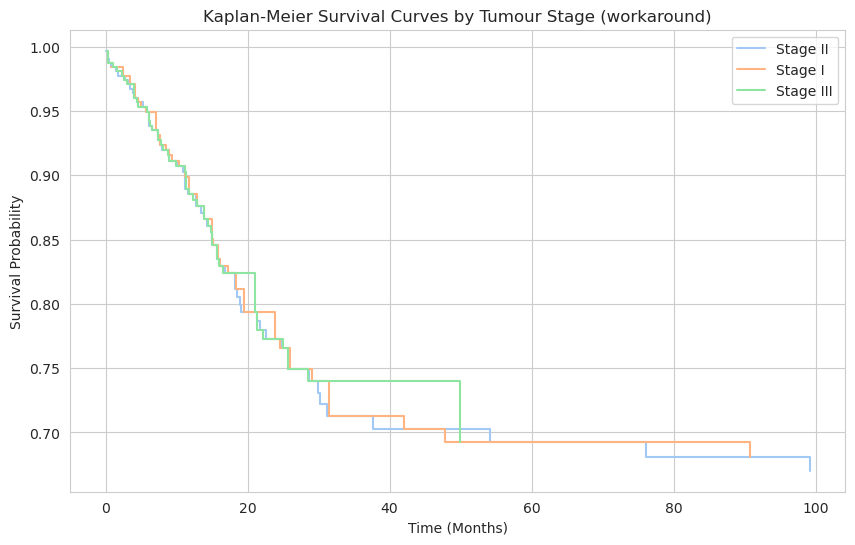

In [23]:
# Identify the unique Tumour Stages in the dataset
unique_tumour_stages = df_clean['Tumour_Stage'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    plt.figure(figsize=(10,6))

    # Tumour Stage
    for tumour_stage in unique_tumour_stages:
        mask = df_clean['Tumour_Stage'] == tumour_stage
        kmf.fit(T[mask], E[mask], label=f'Stage {tumour_stage}')
        kmf.plot_survival_function()

    plt.title('Kaplan-Meier Survival Curves by Tumour Stage')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')

    plt.show()
else:
    # lifelines is not available, so we'll create a workaround
    survival_data_stage = df_clean.groupby(['Survival_Time_Months', 'Tumour_Stage', 'Patient_Status']).size().unstack().fillna(0)
    survival_data_stage['total'] = survival_data_stage.sum(axis=1)
    survival_data_stage['censored'] = survival_data_stage['Alive'].cumsum()
    survival_data_stage['events'] = survival_data_stage['Dead'].cumsum()
    survival_data_stage['at_risk'] = survival_data_stage['total'].sum() - survival_data_stage['censored'].shift(1).fillna(0)
    survival_data_stage['deaths'] = survival_data_stage['Dead'] / survival_data_stage['at_risk']
    survival_data_stage['survival'] = (1 - survival_data_stage['deaths']).cumprod()

    plt.figure(figsize=(10,6))

    for tumour_stage in unique_tumour_stages:
        survival_data_subset = survival_data_stage.xs(tumour_stage, level='Tumour_Stage')
        plt.step(survival_data_subset.index, survival_data_subset['survival'], where='post', label=f'Stage {tumour_stage}')

    plt.title('Kaplan-Meier Survival Curves by Tumour Stage (workaround)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()

    plt.show()


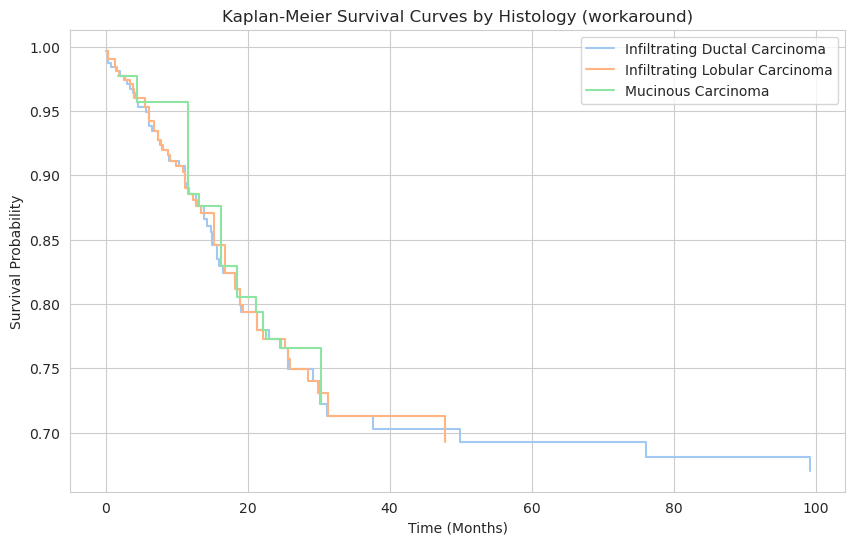

In [24]:
# Identify the unique Histology types in the dataset
unique_histologies = df_clean['Histology'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    plt.figure(figsize=(10,6))

    # Histology
    for histology in unique_histologies:
        mask = df_clean['Histology'] == histology
        kmf.fit(T[mask], E[mask], label=f'{histology}')
        kmf.plot_survival_function()

    plt.title('Kaplan-Meier Survival Curves by Histology')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')

    plt.show()
else:
    # lifelines is not available, so we'll create a workaround
    survival_data_histology = df_clean.groupby(['Survival_Time_Months', 'Histology', 'Patient_Status']).size().unstack().fillna(0)
    survival_data_histology['total'] = survival_data_histology.sum(axis=1)
    survival_data_histology['censored'] = survival_data_histology['Alive'].cumsum()
    survival_data_histology['events'] = survival_data_histology['Dead'].cumsum()
    survival_data_histology['at_risk'] = survival_data_histology['total'].sum() - survival_data_histology['censored'].shift(1).fillna(0)
    survival_data_histology['deaths'] = survival_data_histology['Dead'] / survival_data_histology['at_risk']
    survival_data_histology['survival'] = (1 - survival_data_histology['deaths']).cumprod()

    plt.figure(figsize=(10,6))

    for histology in unique_histologies:
        survival_data_subset = survival_data_histology.xs(histology, level='Histology')
        plt.step(survival_data_subset.index, survival_data_subset['survival'], where='post', label=f'{histology}')

    plt.title('Kaplan-Meier Survival Curves by Histology (workaround)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()

    plt.show()


In [25]:
# Define age groups in increments of 10 years
bins = range(0, df_clean['Age'].max() + 10, 10)
labels = [f'{i}-{i+10}' for i in bins[:-1]]
df_clean['Age_group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)

# Identify the unique Age groups in the dataset
unique_age_groups = df_clean['Age_group'].unique()


/tmp/ipykernel_20/3583600249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age_group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)


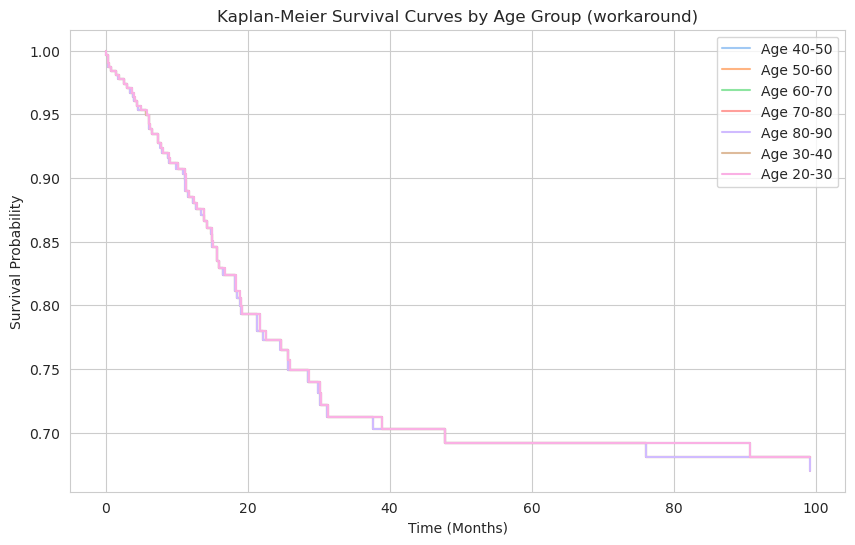

In [26]:
# Drop rows with missing Age group information
df_clean_age = df_clean.dropna(subset=['Age_group'])

# Identify the unique Age groups in the cleaned dataset
unique_age_groups = df_clean_age['Age_group'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    plt.figure(figsize=(10,6))

    # Age group
    for age_group in unique_age_groups:
        mask = df_clean_age['Age_group'] == age_group
        kmf.fit(T[mask], E[mask], label=f'Age {age_group}')
        kmf.plot_survival_function()

    plt.title('Kaplan-Meier Survival Curves by Age Group')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')

    plt.show()
else:
    # lifelines is not available, so we'll create a workaround
    survival_data_age = df_clean_age.groupby(['Survival_Time_Months', 'Age_group', 'Patient_Status']).size().unstack().fillna(0)
    survival_data_age['total'] = survival_data_age.sum(axis=1)
    survival_data_age['censored'] = survival_data_age['Alive'].cumsum()
    survival_data_age['events'] = survival_data_age['Dead'].cumsum()
    survival_data_age['at_risk'] = survival_data_age['total'].sum() - survival_data_age['censored'].shift(1).fillna(0)
    survival_data_age['deaths'] = survival_data_age['Dead'] / survival_data_age['at_risk']
    survival_data_age['survival'] = (1 - survival_data_age['deaths']).cumprod()

    plt.figure(figsize=(10,6))

    for age_group in unique_age_groups:
        survival_data_subset = survival_data_age.xs(age_group, level='Age_group')
        plt.step(survival_data_subset.index, survival_data_subset['survival'], where='post', label=f'Age {age_group}')

    plt.title('Kaplan-Meier Survival Curves by Age Group (workaround)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()

    plt.show()


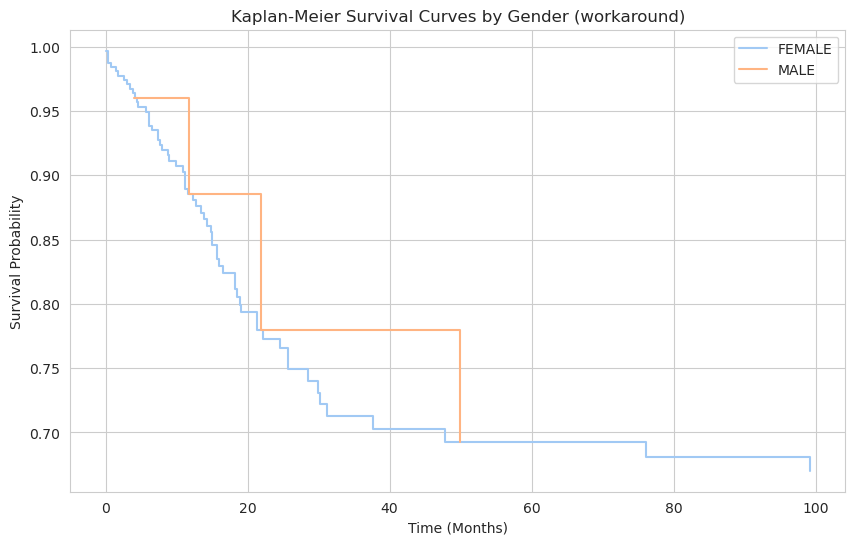

In [27]:
# Identify the unique Genders in the dataset
unique_genders = df_clean['Gender'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    plt.figure(figsize=(10,6))

    # Gender
    for gender in unique_genders:
        mask = df_clean['Gender'] == gender
        kmf.fit(T[mask], E[mask], label=f'{gender}')
        kmf.plot_survival_function()

    plt.title('Kaplan-Meier Survival Curves by Gender')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')

    plt.show()
else:
    # lifelines is not available, so we'll create a workaround
    survival_data_gender = df_clean.groupby(['Survival_Time_Months', 'Gender', 'Patient_Status']).size().unstack().fillna(0)
    survival_data_gender['total'] = survival_data_gender.sum(axis=1)
    survival_data_gender['censored'] = survival_data_gender['Alive'].cumsum()
    survival_data_gender['events'] = survival_data_gender['Dead'].cumsum()
    survival_data_gender['at_risk'] = survival_data_gender['total'].sum() - survival_data_gender['censored'].shift(1).fillna(0)
    survival_data_gender['deaths'] = survival_data_gender['Dead'] / survival_data_gender['at_risk']
    survival_data_gender['survival'] = (1 - survival_data_gender['deaths']).cumprod()

    plt.figure(figsize=(10,6))

    for gender in unique_genders:
        survival_data_subset = survival_data_gender.xs(gender, level='Gender')
        plt.step(survival_data_subset.index, survival_data_subset['survival'], where='post', label=f'{gender}')

    plt.title('Kaplan-Meier Survival Curves by Gender (workaround)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()

    plt.show()


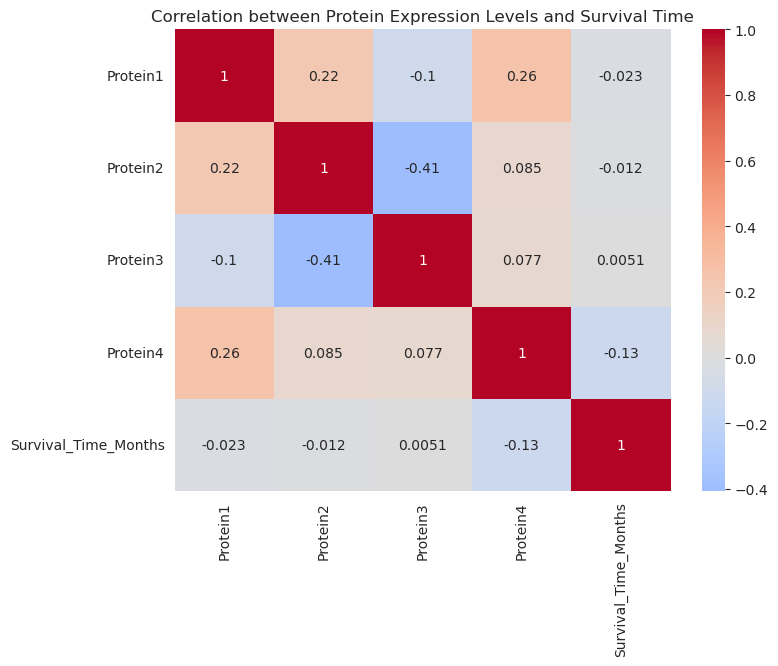

In [28]:
# Calculate the correlation between protein expression levels and survival time
protein_cols = ['Protein1', 'Protein2', 'Protein3', 'Protein4']
correlation = df_clean[protein_cols + ['Survival_Time_Months']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Protein Expression Levels and Survival Time')
plt.show()


/tmp/ipykernel_20/2939306244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Protein1_Level'] = ['High' if p > median_protein1 else 'Low' for p in df_clean['Protein1']]


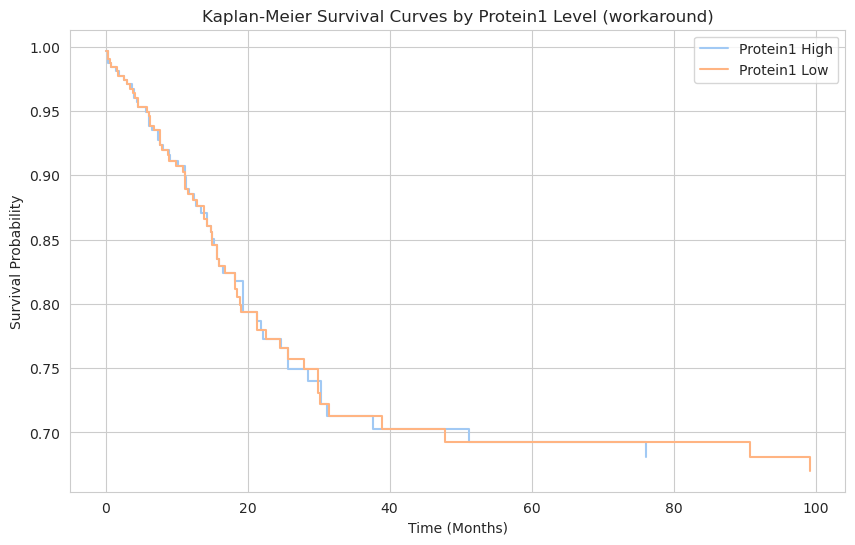

In [29]:
# Divide patients into "High" and "Low" Protein1 expression groups
median_protein1 = df_clean['Protein1'].median()
df_clean['Protein1_Level'] = ['High' if p > median_protein1 else 'Low' for p in df_clean['Protein1']]

# Identify the unique Protein1 Levels in the dataset
unique_protein1_levels = df_clean['Protein1_Level'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    plt.figure(figsize=(10,6))

    # Protein1 Level
    for protein1_level in unique_protein1_levels:
        mask = df_clean['Protein1_Level'] == protein1_level
        kmf.fit(T[mask], E[mask], label=f'Protein1 {protein1_level}')
        kmf.plot_survival_function()

    plt.title('Kaplan-Meier Survival Curves by Protein1 Level')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')

    plt.show()
else:
    # lifelines is not available, so we'll create a workaround
    survival_data_protein1 = df_clean.groupby(['Survival_Time_Months', 'Protein1_Level', 'Patient_Status']).size().unstack().fillna(0)
    survival_data_protein1['total'] = survival_data_protein1.sum(axis=1)
    survival_data_protein1['censored'] = survival_data_protein1['Alive'].cumsum()
    survival_data_protein1['events'] = survival_data_protein1['Dead'].cumsum()
    survival_data_protein1['at_risk'] = survival_data_protein1['total'].sum() - survival_data_protein1['censored'].shift(1).fillna(0)
    survival_data_protein1['deaths'] = survival_data_protein1['Dead'] / survival_data_protein1['at_risk']
    survival_data_protein1['survival'] = (1 - survival_data_protein1['deaths']).cumprod()

    plt.figure(figsize=(10,6))

    for protein1_level in unique_protein1_levels:
        survival_data_subset = survival_data_protein1.xs(protein1_level, level='Protein1_Level')
        plt.step(survival_data_subset.index, survival_data_subset['survival'], where='post', label=f'Protein1 {protein1_level}')

    plt.title('Kaplan-Meier Survival Curves by Protein1 Level (workaround)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()

    plt.show()


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Convert categorical variables into numerical variables
le = LabelEncoder()
df_logistic = df_clean.copy()
df_logistic['Gender'] = le.fit_transform(df_logistic['Gender'])
df_logistic['Tumour_Stage'] = le.fit_transform(df_logistic['Tumour_Stage'])
df_logistic['Histology'] = le.fit_transform(df_logistic['Histology'])
df_logistic['Surgery_type'] = le.fit_transform(df_logistic['Surgery_type'])
df_logistic['Patient_Status'] = le.fit_transform(df_logistic['Patient_Status'])

# Define predictor variables and outcome variable
X = df_logistic[['Age', 'Gender', 'Tumour_Stage', 'Histology', 'Surgery_type', 'Protein1', 'Protein2', 'Protein3', 'Protein4']]
y = df_logistic['Patient_Status']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predict the outcomes for the test set
y_pred = logistic_model.predict(X_test)

# Print the classification report
classification_report(y_test, y_pred)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.80      1.00      0.89        51\n           1       0.00      0.00      0.00        13\n\n    accuracy                           0.80        64\n   macro avg       0.40      0.50      0.44        64\nweighted avg       0.64      0.80      0.71        64\n'

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Predict the outcomes for the test set
y_pred_rf = random_forest_model.predict(X_test)

# Print the classification report
classification_report(y_test, y_pred_rf)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.80      1.00      0.89        51\n           1       0.00      0.00      0.00        13\n\n    accuracy                           0.80        64\n   macro avg       0.40      0.50      0.44        64\nweighted avg       0.64      0.80      0.71        64\n'

In [32]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df_logistic[df_logistic['Patient_Status'] == 0]
df_minority = df_logistic[df_logistic['Patient_Status'] == 1]

# Oversample the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine the majority class and the upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Define predictor variables and outcome variable
X_upsampled = df_upsampled[['Age', 'Gender', 'Tumour_Stage', 'Histology', 'Surgery_type', 'Protein1', 'Protein2', 'Protein3', 'Protein4']]
y_upsampled = df_upsampled['Patient_Status']

# Split the data into training set and test set
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Fit the Random Forest Model to the upsampled training data
random_forest_model_upsampled = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model_upsampled.fit(X_train_upsampled, y_train_upsampled)

# Predict the outcomes for the test set
y_pred_rf_upsampled = random_forest_model_upsampled.predict(X_test_upsampled)

# Print the classification report
classification_report(y_test_upsampled, y_pred_rf_upsampled)


'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99        53\n           1       1.00      0.98      0.99        49\n\n    accuracy                           0.99       102\n   macro avg       0.99      0.99      0.99       102\nweighted avg       0.99      0.99      0.99       102\n'

In [33]:
# Calculate feature importances
importances = random_forest_model_upsampled.feature_importances_

# Create a DataFrame to hold the feature names and their corresponding importance values
feature_importances = pd.DataFrame({'feature': X_train_upsampled.columns, 'importance': importances})

# Sort the DataFrame by the importance values
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Display the feature importances
feature_importances


,feature,importance
8,Protein4,0.199191
6,Protein2,0.191445
5,Protein1,0.178111
7,Protein3,0.147111
0,Age,0.137807
4,Surgery_type,0.069526
2,Tumour_Stage,0.047641
3,Histology,0.024816
1,Gender,0.004351


/tmp/ipykernel_20/3118505582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[protein + '_Level'] = ['High' if p > median_protein else 'Low' for p in df_clean[protein]]
/tmp/ipykernel_20/3118505582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[protein + '_Level'] = ['High' if p > median_protein else 'Low' for p in df_clean[protein]]
/tmp/ipykernel_20/3118505582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

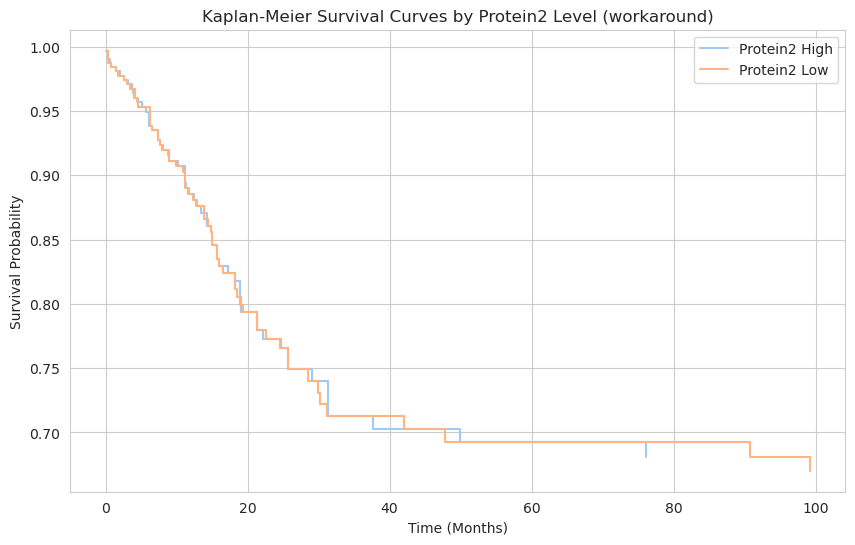

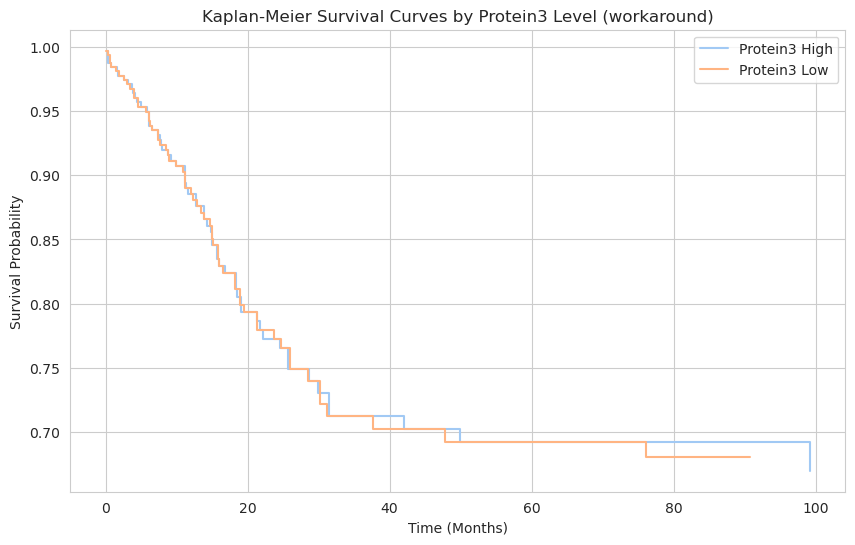

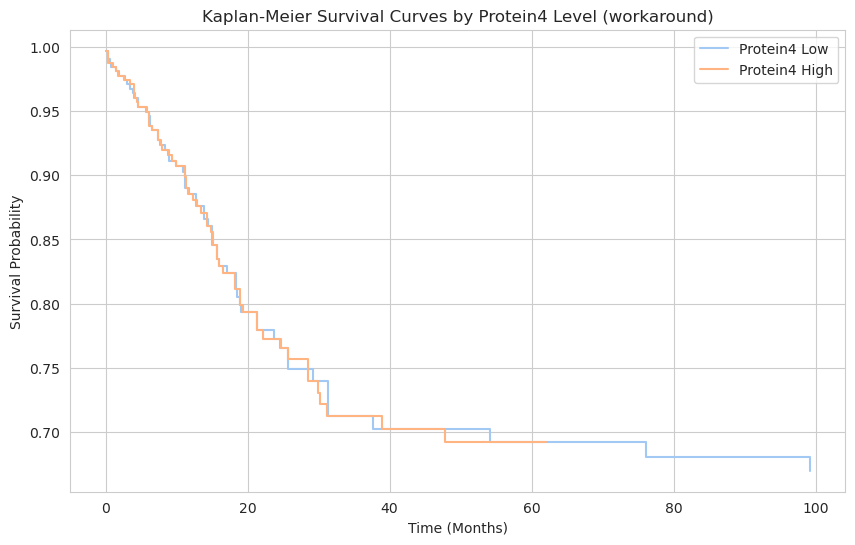

In [34]:
# Divide patients into "High" and "Low" Protein2, Protein3, and Protein4 expression groups
for protein in ['Protein2', 'Protein3', 'Protein4']:
    median_protein = df_clean[protein].median()
    df_clean[protein + '_Level'] = ['High' if p > median_protein else 'Low' for p in df_clean[protein]]

# Identify the unique Protein2, Protein3, and Protein4 Levels in the dataset
unique_protein2_levels = df_clean['Protein2_Level'].unique()
unique_protein3_levels = df_clean['Protein3_Level'].unique()
unique_protein4_levels = df_clean['Protein4_Level'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    # Protein2 Level
    plt.figure(figsize=(10,6))
    for protein2_level in unique_protein2_levels:
        mask = df_clean['Protein2_Level'] == protein2_level
        kmf.fit(T[mask], E[mask], label=f'Protein2 {protein2_level}')
        kmf.plot_survival_function()
    plt.title('Kaplan-Meier Survival Curves by Protein2 Level')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.show()

    # Protein3 Level
    plt.figure(figsize=(10,6))
    for protein3_level in unique_protein3_levels:
        mask = df_clean['Protein3_Level'] == protein3_level
        kmf.fit(T[mask], E[mask], label=f'Protein3 {protein3_level}')
        kmf.plot_survival_function()
    plt.title('Kaplan-Meier Survival Curves by Protein3 Level')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.show()

    # Protein4 Level
    plt.figure(figsize=(10,6))
    for protein4_level in unique_protein4_levels:
        mask = df_clean['Protein4_Level'] == protein4_level
        kmf.fit(T[mask], E[mask], label=f'Protein4 {protein4_level}')
        kmf.plot_survival_function()
    plt.title('Kaplan-Meier Survival Curves by Protein4 Level')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.show()

else:
    # lifelines is not available, so we'll create a workaround
    for protein, unique_protein_levels in [('Protein2', unique_protein2_levels), ('Protein3', unique_protein3_levels), ('Protein4', unique_protein4_levels)]:
        survival_data_protein = df_clean.groupby(['Survival_Time_Months', protein + '_Level', 'Patient_Status']).size().unstack().fillna(0)
        survival_data_protein['total'] = survival_data_protein.sum(axis=1)
        survival_data_protein['censored'] = survival_data_protein['Alive'].cumsum()
        survival_data_protein['events'] = survival_data_protein['Dead'].cumsum()
        survival_data_protein['at_risk'] = survival_data_protein['total'].sum() - survival_data_protein['censored'].shift(1).fillna(0)
        survival_data_protein['deaths'] = survival_data_protein['Dead'] / survival_data_protein['at_risk']
        survival_data_protein['survival'] = (1 - survival_data_protein['deaths']).cumprod()

        plt.figure(figsize=(10,6))
        for protein_level in unique_protein_levels:
            survival_data_subset = survival_data_protein.xs(protein_level, level=protein + '_Level')
            plt.step(survival_data_subset.index, survival_data_subset['survival'], where='post', label=f'{protein} {protein_level}')
        plt.title(f'Kaplan-Meier Survival Curves by {protein} Level (workaround)')
        plt.xlabel('Time (Months)')
        plt.ylabel('Survival Probability')
        plt.legend()
        plt.show()


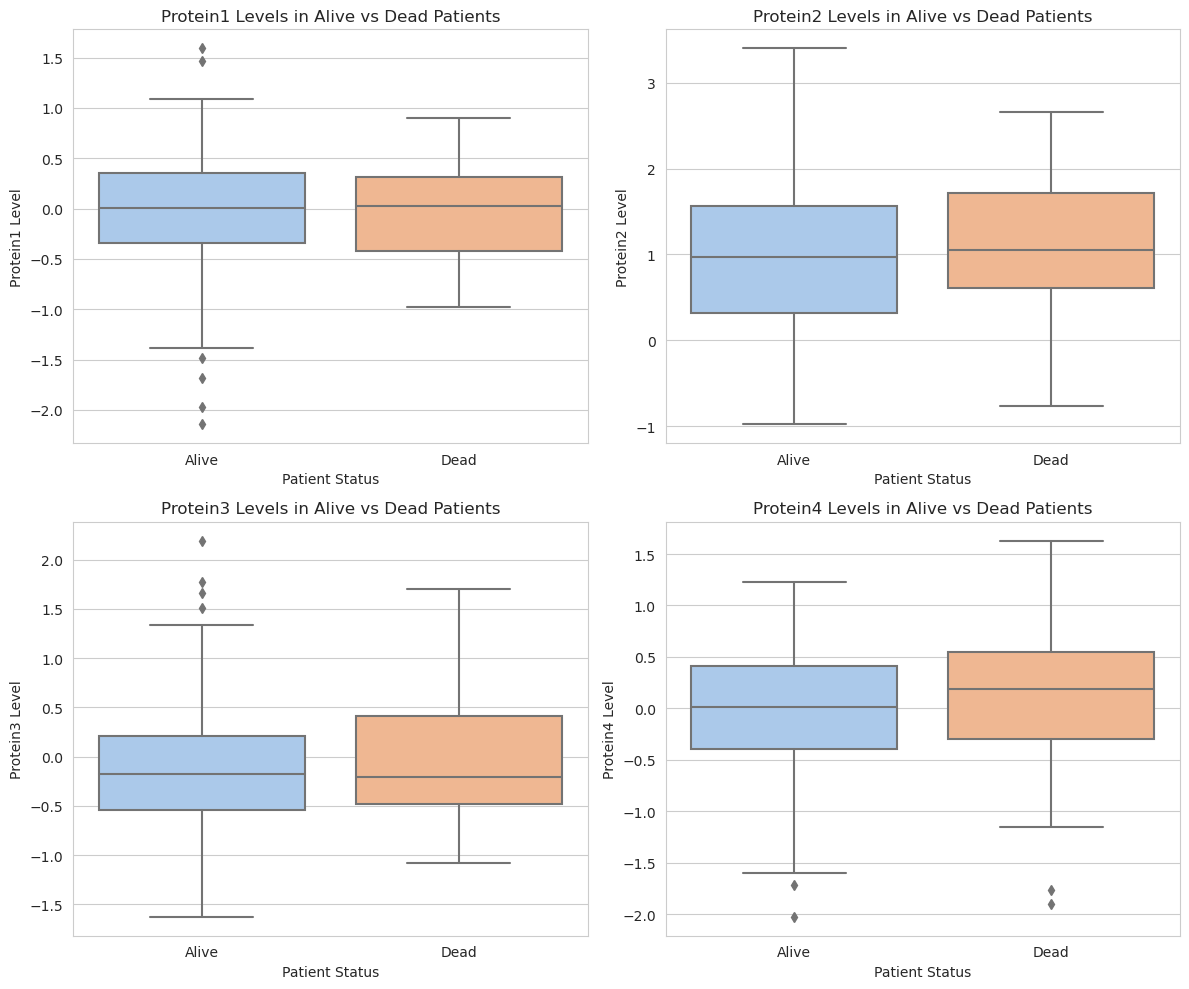

In [35]:
# Create boxplots for Protein1, Protein2, Protein3, and Protein4 levels in the two groups of patients (Alive and Dead)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, protein in zip(axes.flatten(), ['Protein1', 'Protein2', 'Protein3', 'Protein4']):
    sns.boxplot(x='Patient_Status', y=protein, data=df_clean, ax=ax)
    ax.set_title(f'{protein} Levels in Alive vs Dead Patients')
    ax.set_xlabel('Patient Status')
    ax.set_ylabel(f'{protein} Level')

plt.tight_layout()
plt.show()


In [36]:
from scipy.stats import mannwhitneyu

# Initialize an empty DataFrame to hold the results of the Mann-Whitney U tests
mann_whitney_results = pd.DataFrame(columns=['Protein', 'U Statistic', 'P Value'])

# Perform the Mann-Whitney U test for each protein
for protein in ['Protein1', 'Protein2', 'Protein3', 'Protein4']:
    alive = df_clean.loc[df_clean['Patient_Status'] == 'Alive', protein]
    dead = df_clean.loc[df_clean['Patient_Status'] == 'Dead', protein]
    u_statistic, p_value = mannwhitneyu(alive, dead)
    mann_whitney_results = mann_whitney_results.append({'Protein': protein, 'U Statistic': u_statistic, 'P Value': p_value}, ignore_index=True)

# Display the results of the Mann-Whitney U tests
mann_whitney_results


/tmp/ipykernel_20/3210919840.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mann_whitney_results = mann_whitney_results.append({'Protein': protein, 'U Statistic': u_statistic, 'P Value': p_value}, ignore_index=True)
/tmp/ipykernel_20/3210919840.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mann_whitney_results = mann_whitney_results.append({'Protein': protein, 'U Statistic': u_statistic, 'P Value': p_value}, ignore_index=True)
/tmp/ipykernel_20/3210919840.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mann_whitney_results = mann_whitney_results.append({'Protein': protein, 'U Statistic': u_statistic, 'P Value': p_value}, ignore_index=True)
/tmp/ipykernel_20/3210919840.py:11: FutureWarning: The frame.append

,Protein,U Statistic,P Value
0,Protein1,8204.5,0.644127
1,Protein2,7062.0,0.193050
2,Protein3,7656.0,0.701040
3,Protein4,7054.5,0.189116


In [37]:
# Convert 'Tumour_Stage' and 'Surgery_type' to numeric types
df_clean['Tumour_Stage'] = df_clean['Tumour_Stage'].astype('category').cat.codes
df_clean['Surgery_type'] = df_clean['Surgery_type'].astype('category').cat.codes

# Recalculate correlation coefficients for Protein1, Protein2, Protein3, and Protein4 levels against Tumour_Stage, Surgery_type, and Age
correlation_results = pd.DataFrame(columns=['Variable', 'Protein', 'Correlation Coefficient'])

for variable in ['Tumour_Stage', 'Surgery_type', 'Age']:
    for protein in ['Protein1', 'Protein2', 'Protein3', 'Protein4']:
        correlation_coefficient = df_clean[protein].corr(df_clean[variable])
        correlation_results = correlation_results.append({'Variable': variable, 'Protein': protein, 'Correlation Coefficient': correlation_coefficient}, ignore_index=True)

# Display the correlation coefficients
correlation_results


/tmp/ipykernel_20/3129208910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Tumour_Stage'] = df_clean['Tumour_Stage'].astype('category').cat.codes
/tmp/ipykernel_20/3129208910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Surgery_type'] = df_clean['Surgery_type'].astype('category').cat.codes
/tmp/ipykernel_20/3129208910.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_resul

,Variable,Protein,Correlation Coefficient
0,Tumour_Stage,Protein1,-0.051447
1,Tumour_Stage,Protein2,-0.049881
2,Tumour_Stage,Protein3,0.019770
3,Tumour_Stage,Protein4,-0.050364
4,Surgery_type,Protein1,-0.127882
5,Surgery_type,Protein2,-0.045292
6,Surgery_type,Protein3,-0.059958
7,Surgery_type,Protein4,-0.113382
8,Age,Protein1,-0.044541
9,Age,Protein2,-0.011387


In [38]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gradient_boosting_model.fit(X_train_upsampled, y_train_upsampled)

# Predict the outcomes for the test set
y_pred_gb = gradient_boosting_model.predict(X_test_upsampled)

# Print the classification report
classification_report(y_test_upsampled, y_pred_gb)


'              precision    recall  f1-score   support\n\n           0       0.94      0.87      0.90        53\n           1       0.87      0.94      0.90        49\n\n    accuracy                           0.90       102\n   macro avg       0.90      0.90      0.90       102\nweighted avg       0.90      0.90      0.90       102\n'

In [39]:
# Calculate feature importances
importances_gb = gradient_boosting_model.feature_importances_

# Create a DataFrame to hold the feature names and their corresponding importance values
feature_importances_gb = pd.DataFrame({'feature': X_train_upsampled.columns, 'importance': importances_gb})

# Sort the DataFrame by the importance values
feature_importances_gb = feature_importances_gb.sort_values('importance', ascending=False)

# Display the feature importances
feature_importances_gb


,feature,importance
5,Protein1,0.245719
6,Protein2,0.232622
8,Protein4,0.201680
7,Protein3,0.110342
4,Surgery_type,0.090999
0,Age,0.081940
2,Tumour_Stage,0.029893
3,Histology,0.006805
1,Gender,0.000000


In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Create interaction terms
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_interactions = poly.fit_transform(X_train_upsampled)
X_test_interactions = poly.transform(X_test_upsampled)

# Define the logistic regression model
logistic_regression_model_interactions = LogisticRegression(max_iter=10000, random_state=42)

# Fit the model to the training data
logistic_regression_model_interactions.fit(X_train_interactions, y_train_upsampled)

# Predict the outcomes for the test set
y_pred_lr_interactions = logistic_regression_model_interactions.predict(X_test_interactions)

# Print the classification report
classification_report(y_test_upsampled, y_pred_lr_interactions)


'              precision    recall  f1-score   support\n\n           0       0.64      0.64      0.64        53\n           1       0.61      0.61      0.61        49\n\n    accuracy                           0.63       102\n   macro avg       0.63      0.63      0.63       102\nweighted avg       0.63      0.63      0.63       102\n'

In [41]:
# Get the coefficients of the interaction terms
interaction_coefficients = logistic_regression_model_interactions.coef_[0]

# Create a DataFrame to hold the interaction term names and their corresponding coefficient values
interaction_terms = pd.DataFrame({'interaction_term': poly.get_feature_names_out(X_train_upsampled.columns), 'coefficient': interaction_coefficients})

# Sort the DataFrame by the absolute values of the coefficients
interaction_terms = interaction_terms.reindex(interaction_terms.coefficient.abs().sort_values(ascending=False).index)

# Display the interaction terms and their coefficients
interaction_terms


,interaction_term,coefficient
29,Tumour_Stage Protein4,1.118682
34,Histology Protein4,1.058906
35,Surgery_type Protein1,1.021419
3,Histology,-0.944357
23,Gender Protein4,-0.863652
21,Gender Protein2,0.839826
4,Surgery_type,-0.812768
18,Gender Histology,0.800245
38,Surgery_type Protein4,0.669892
42,Protein2 Protein3,0.581744


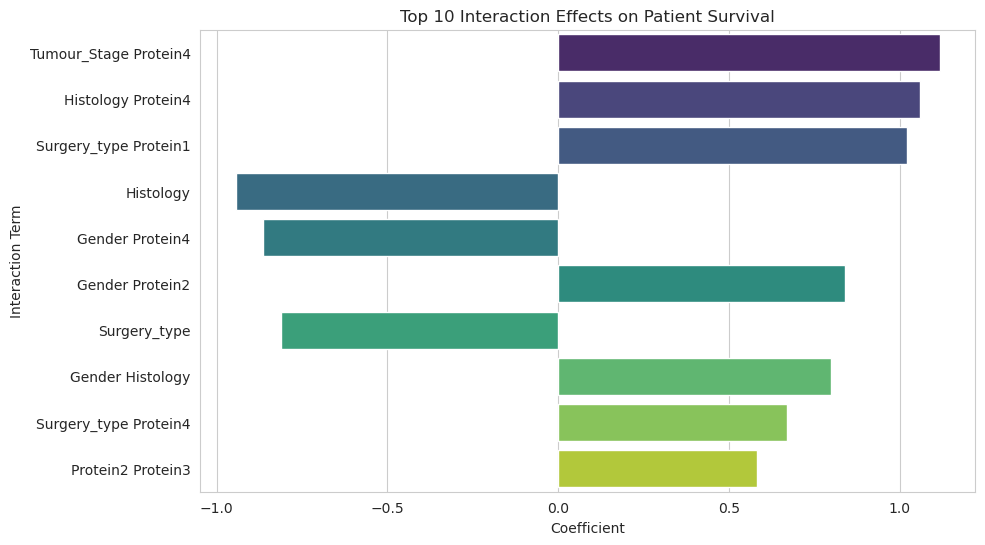

In [42]:
# Select the top 10 interaction terms by absolute coefficient value
top_interaction_terms = interaction_terms.head(10)

# Create a bar plot of the absolute values of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='interaction_term', data=top_interaction_terms, palette='viridis')
plt.title('Top 10 Interaction Effects on Patient Survival')
plt.xlabel('Coefficient')
plt.ylabel('Interaction Term')
plt.show()
